In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Importing the Data

In [2]:
x_df = pd.read_csv('Leads.csv')
x_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspect the DataFrame

In [3]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# Number of rows and columns of the DataFrame
x_df.shape

(9240, 37)

In [5]:
# Summary of the numeric columns of the DataFrame
x_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Finding the null values of the DataFrame
x_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

- Seems like many columns have around 50% of the values null


In [7]:
# Pecentage of null values
x_df.isnull().sum()*100/len(x_df)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Cleaning the DataFrame

In [8]:
## Removing the columns that have 30% or above of values null
# Filling the null values with mode value of the column may affect the analysis
data_df = x_df.drop(['Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 
                    'Asymmetrique Activity Index', 'Lead Quality', 'Tags',], axis=1)

In [9]:
data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [10]:
data_df.shape

(9240, 31)

In [11]:
data_df.isnull().sum()*100/len(data_df)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [12]:
# Filling the null values of Lead Source column
data_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
blog                    1
WeLearn                 1
welearnblog_Home        1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
youtubechannel          1
Name: Lead Source, dtype: int64

In [13]:
# Filling the null values with the most occurring value
data_df['Lead Source'] = data_df['Lead Source'].fillna(data_df['Lead Source'].mode()[0])

In [14]:
data_df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
blog                    1
WeLearn                 1
welearnblog_Home        1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
youtubechannel          1
Name: Lead Source, dtype: int64

In [15]:
# Most occurring value of TotalVisits column
data_df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [16]:
# Filling the null values of TotalVisits column
data_df['TotalVisits'] = data_df['TotalVisits'].fillna(data_df['TotalVisits'].mode()[0])

In [17]:
data_df['TotalVisits'].value_counts()

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [18]:
# Most occurring value of Page Views Per Visit column
data_df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [19]:
# Fiiling the null values of Page Views Per Visit column
data_df['Page Views Per Visit'] = data_df['Page Views Per Visit'].fillna(data_df['Page Views Per Visit'].mode()[0])

In [20]:
data_df['Page Views Per Visit'].value_counts()

0.00    2326
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [21]:
# Most occurring value of Last Activity column
data_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [22]:
# Filling the null values of Last Activity column
data_df['Last Activity'] = data_df['Last Activity'].fillna(data_df['Last Activity'].mode()[0])

In [23]:
data_df['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [24]:
# Most occurring value Country column
data_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Germany                    4
Nigeria                    4
Canada                     4
Kuwait                     4
Sweden                     3
China                      2
Italy                      2
Philippines                2
Netherlands                2
Asia/Pacific Region        2
Belgium                    2
Bangladesh                 2
Uganda                     2
Ghana                      2
Malaysia                   1
Liberia                    1
Indonesia                  1
Vietnam                    1
Denmark                    1
Russia                     1
Switzerland   

In [25]:
# Filling the null values of Country column
data_df['Country'] = data_df['Country'].fillna(data_df['Country'].mode()[0])

In [26]:
# Most occurring value of Specialization column
data_df.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
# Filling the null values of Specialization column
data_df['Specialization'] = data_df['Specialization'].fillna(data_df['Specialization'].mode()[0])

In [28]:
# Most occurring value pf How did you hear about X Education
data_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [29]:
#Filling the null values of How did you hear about X Education
data_df['How did you hear about X Education'] = data_df['How did you hear about X Education'].fillna(
data_df['How did you hear about X Education'].mode()[0])

In [30]:
# Filling the null values of What is your current occupation
data_df['What is your current occupation'] = data_df['What is your current occupation'].fillna(
data_df['What is your current occupation'].mode()[0])

In [31]:
data_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [32]:
# Filling the null values of What matters most to you in choosing a course column
data_df['What matters most to you in choosing a course'] = data_df['What matters most to you in choosing a course'].fillna(
data_df['What matters most to you in choosing a course'].mode()[0])

In [33]:
# Filling the null values of Lead Profile column
data_df['Lead Profile'] = data_df['Lead Profile'].fillna(data_df['Lead Profile'].mode()[0])

In [34]:
# Filling the null values of City column
data_df.City = data_df.City.fillna(data_df.City.mode()[0])

In [35]:
data_df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

## EDA
### Univariate Analysis
#### Categorical Variables

In [36]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

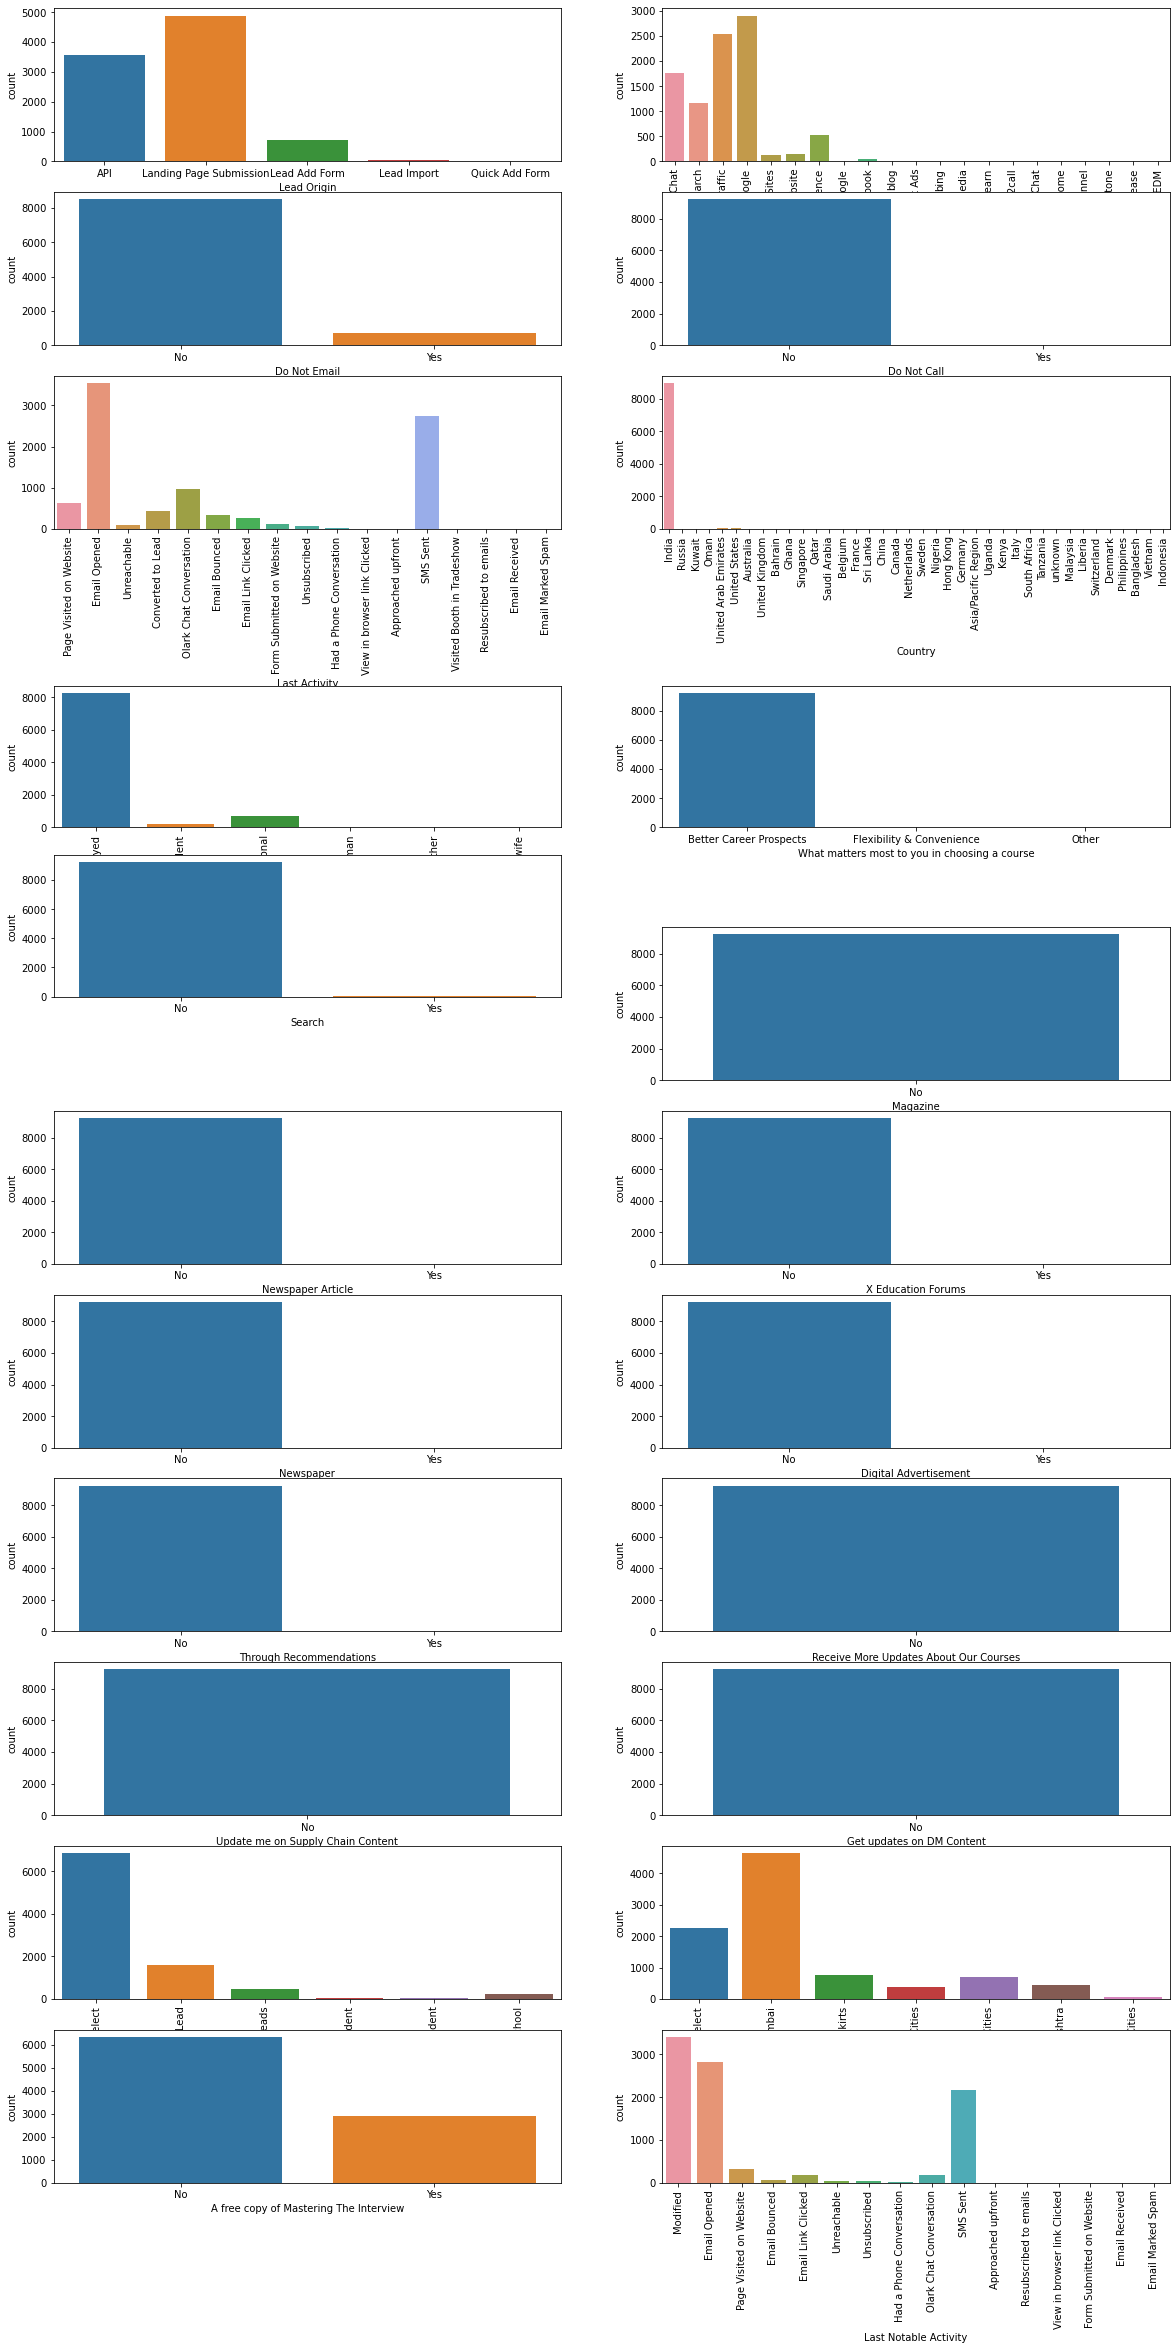

In [37]:
# Categorical Variables
plt.figure(figsize=(20,40))

plt.subplot(12,2,1)
sns.countplot(data_df['Lead Origin'])

plt.subplot(12,2,2)
sns.countplot(data_df['Lead Source'])
plt.xticks(rotation=90)

plt.subplot(12,2,3)
sns.countplot(data_df['Do Not Email'])

plt.subplot(12,2,4)
sns.countplot(data_df['Do Not Call'])

plt.subplot(12,2,5)
sns.countplot(data_df['Last Activity'])
plt.xticks(rotation=90)

plt.subplot(12,2,6)
sns.countplot(data_df['Country'])
plt.xticks(rotation=90)

plt.subplot(12,2,7)
sns.countplot(data_df.Specialization)
plt.xticks(rotation=90)

plt.subplot(12,2,8)
sns.countplot(data_df['How did you hear about X Education'])
plt.xticks(rotation=90)

plt.subplot(13,2,9)
sns.countplot(data_df['What is your current occupation'])
plt.xticks(rotation=90)

plt.subplot(13,2,10)
sns.countplot(data_df['What matters most to you in choosing a course'])

plt.subplot(13,2,11)
sns.countplot(data_df['Search'])

plt.subplot(12,2,12)
sns.countplot(data_df.Magazine)

plt.subplot(12,2,13)
sns.countplot(data_df['Newspaper Article'])

plt.subplot(12,2,14)
sns.countplot(data_df['X Education Forums'])

plt.subplot(12,2,15)
sns.countplot(data_df['Newspaper'])

plt.subplot(12,2,16)
sns.countplot(data_df['Digital Advertisement'])

plt.subplot(12,2,17)
sns.countplot(data_df['Through Recommendations'])

plt.subplot(12,2,18)
sns.countplot(data_df['Receive More Updates About Our Courses'])

plt.subplot(12,2,19)
sns.countplot(data_df['Update me on Supply Chain Content'])

plt.subplot(12,2,20)
sns.countplot(data_df['Get updates on DM Content'])

plt.subplot(12,2,21)
sns.countplot(data_df['Lead Profile'])
plt.xticks(rotation=90)

plt.subplot(12,2,22)
sns.countplot(data_df['City'])
plt.xticks(rotation=90)

plt.subplot(12,2,23)
sns.countplot(data_df['A free copy of Mastering The Interview'])

plt.subplot(12,2,24)
sns.countplot(data_df['Last Notable Activity'])
plt.xticks(rotation=90)

plt.show()

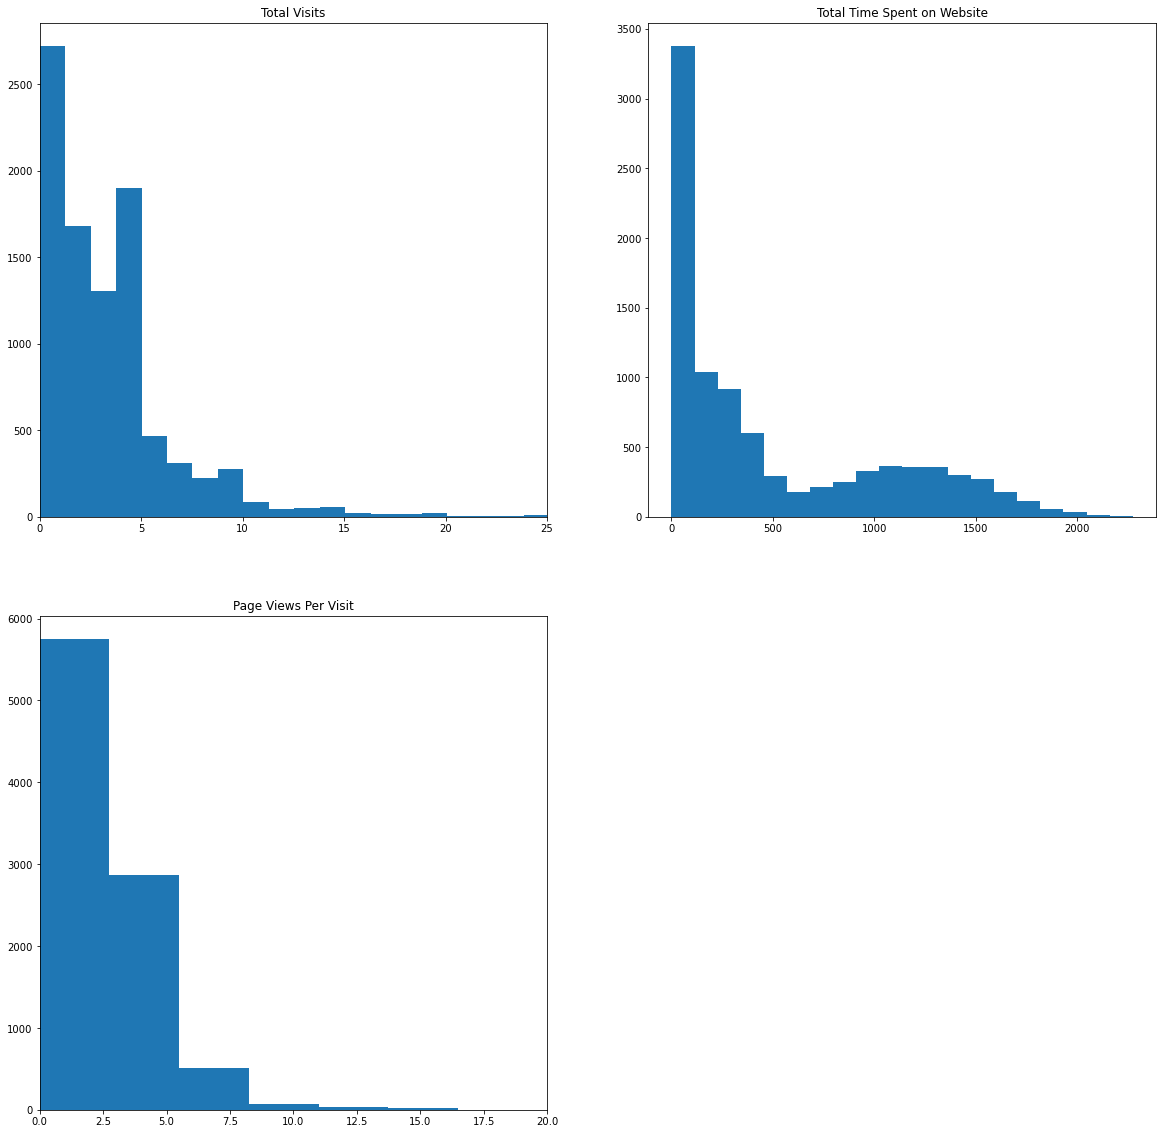

In [38]:
## Numerical Variables
plt.figure(figsize=(20,20))

plt.subplot(221)
plt.hist(data_df['TotalVisits'], bins=200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(data_df['Total Time Spent on Website'], bins=20)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(data_df['Page Views Per Visit'], bins=20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()

#### Relating all the categorical variables to converted

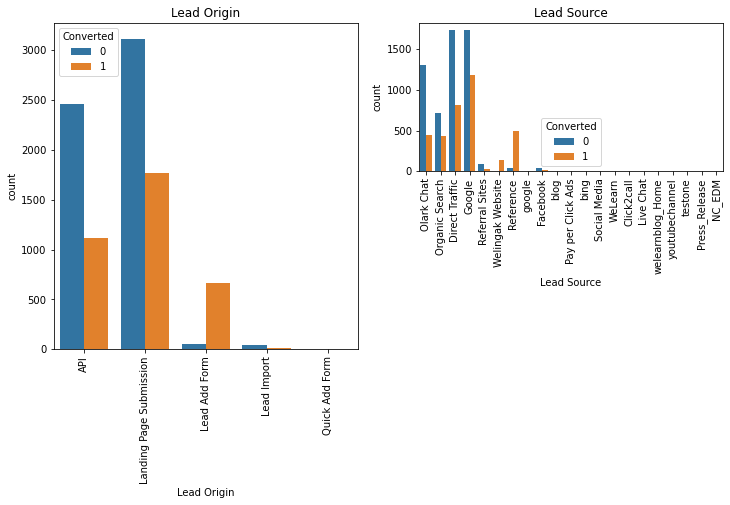

In [39]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.countplot(x='Lead Origin', hue='Converted', data=data_df).tick_params(axis='x', rotation=90)
plt.title('Lead Origin')

plt.subplot(222)
sns.countplot(x='Lead Source', hue='Converted', data=data_df).tick_params(axis='x', rotation=90)
plt.title('Lead Source')
plt.show()

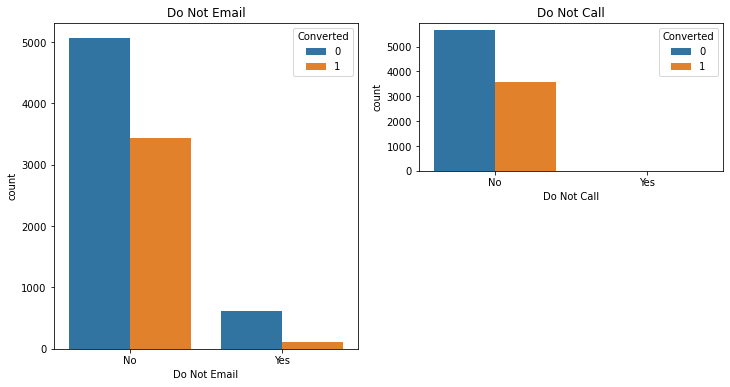

In [40]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.countplot(x='Do Not Email', hue='Converted', data=data_df).tick_params(axis='x')
plt.title('Do Not Email')

plt.subplot(222)
sns.countplot(x='Do Not Call', hue='Converted', data=data_df).tick_params(axis='x')
plt.title('Do Not Call')

plt.show()

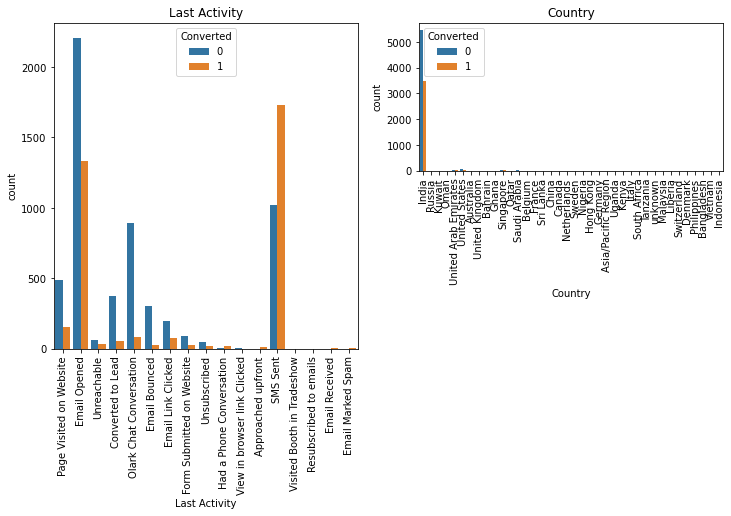

In [41]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.countplot(x='Last Activity', hue='Converted', data=data_df).tick_params(axis='x', rotation=90)
plt.title('Last Activity')

plt.subplot(222)
sns.countplot(x='Country', hue='Converted', data=data_df).tick_params(axis='x', rotation=90)
plt.title('Country')

plt.show()

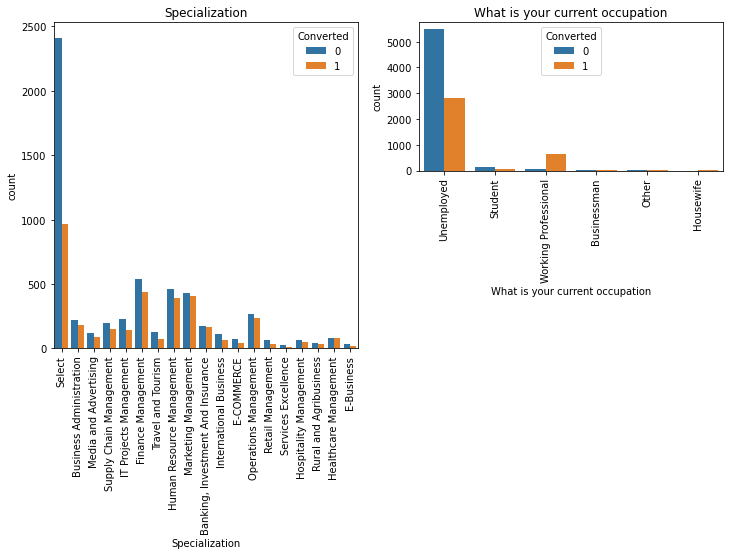

In [42]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.countplot(x='Specialization', hue='Converted', data=data_df).tick_params(axis='x', rotation=90)
plt.title('Specialization')

plt.subplot(222)
sns.countplot(x='What is your current occupation', hue='Converted', data=data_df).tick_params(axis='x', rotation=90)
plt.title('What is your current occupation')

plt.show()

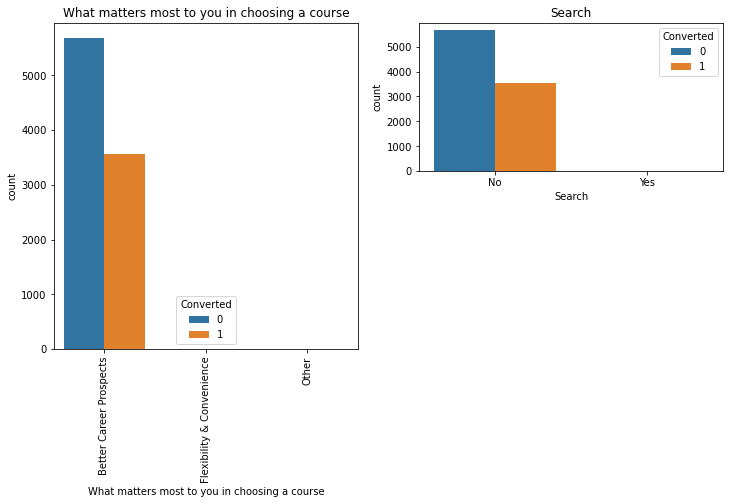

In [43]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=data_df).tick_params(
    axis='x', rotation=90)
plt.title('What matters most to you in choosing a course')

plt.subplot(222)
sns.countplot(x='Search', hue='Converted', data=data_df)
plt.title('Search')

plt.show()

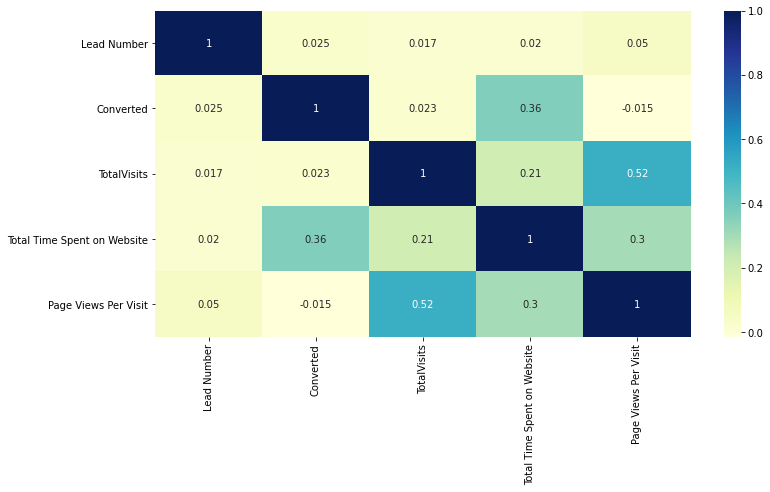

In [44]:
# Check the correlation among variables
plt.figure(figsize=(12,6))
sns.heatmap(data_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [45]:
# Check the numeric variables
numeric = data_df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
numeric.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.327787
std,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000


### Dummy Variables

In [46]:
data_df.loc[:, data_df.dtypes == 'object'].columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [47]:
# Create dummy variables
dummy = pd.get_dummies(data_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 
                'What matters most to you in choosing a course', 'Lead Profile', 'City', 'Last Notable Activity']], drop_first=True)

# Add the results to master dataframe
dum_data_df = pd.concat([data_df, dummy], axis=1)
dum_data_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,0,0,0,0,0,0,0,0,0,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,0,0,0,0,0,0,1,0,0,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,0,0,0,0,0,0,1,0,0,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,0,0,0,0,0,0,1,0,0,0


In [48]:
dum_data_df = dum_data_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 
                'What matters most to you in choosing a course', 'Lead Profile', 'City', 'Last Notable Activity'], axis=1)

In [49]:
dum_data_df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,How did you hear about X Education,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,No,No,0,0.0,0,0.0,India,Select,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,No,No,0,5.0,674,2.5,India,Select,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,No,No,1,2.0,1532,2.0,India,Select,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,No,No,0,1.0,305,1.0,India,Word Of Mouth,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,No,No,1,2.0,1428,1.0,India,Other,...,0,0,1,0,0,0,0,0,0,0


In [50]:
dum_data_df.set_index('Prospect ID', inplace=True)

In [51]:
dum_data_df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,How did you hear about X Education,Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Prospect ID,,,,,,,,,,,,,,,,,,,,,
7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,No,No,0,0.0,0,0.0,India,Select,No,...,0,0,1,0,0,0,0,0,0,0
2a272436-5132-4136-86fa-dcc88c88f482,660728,No,No,0,5.0,674,2.5,India,Select,No,...,0,0,0,0,0,0,0,0,0,0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,No,No,1,2.0,1532,2.0,India,Select,No,...,0,0,0,0,0,0,0,0,0,0
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,No,No,0,1.0,305,1.0,India,Word Of Mouth,No,...,0,0,1,0,0,0,0,0,0,0
3256f628-e534-4826-9d63-4a8b88782852,660681,No,No,1,2.0,1428,1.0,India,Other,No,...,0,0,1,0,0,0,0,0,0,0


In [52]:
dum_data_df.loc[:, dum_data_df.dtypes=='object'].columns

Index(['Do Not Email', 'Do Not Call', 'Country',
       'How did you hear about X Education', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [53]:
dum_data_df = dum_data_df.drop(['Lead Number', 'Do Not Email', 'Do Not Call', 'Country', 'Newspaper Article', 'X Education Forums', 
                               'How did you hear about X Education', 'Newspaper', 'Search', 'Magazine', 'Digital Advertisement', 
                               'Through Recommendations', 'Receive More Updates About Our Courses', 
                               'Update me on Supply Chain Content', 'Get updates on DM Content', 
                               'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'], 1)

In [54]:
dum_data_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Prospect ID,,,,,,,,,,,,,,,,,,,,,
7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Test-Train Split

In [55]:
# Putting fature variable X
X = dum_data_df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Prospect ID,,,,,,,,,,,,,,,,,,,,,
7927b2df-8bba-4d29-b9a2-b6e0beafe620,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2a272436-5132-4136-86fa-dcc88c88f482,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3256f628-e534-4826-9d63-4a8b88782852,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [56]:
# Putting target variable y
y = dum_data_df['Converted']
y.head()

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0
2a272436-5132-4136-86fa-dcc88c88f482    0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    0
3256f628-e534-4826-9d63-4a8b88782852    1
Name: Converted, dtype: int64

In [57]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling


In [58]:
scaler = MinMaxScaler()

In [59]:
# Scale the thre numeric features
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[[
    'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'
]])

In [60]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Prospect ID,,,,,,,,,,,,,,,,,,,,,
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0.015936,0.214349,0.024182,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
db308a34-ade6-4f0d-9779-586c5be188c7,0.019920,0.046655,0.045455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1199b37d-f610-4bb8-bf18-15267dec61fa,0.019920,0.541373,0.090909,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6b2d3b2f-9990-449c-9333-012b578e39c8,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Looking at Correlations

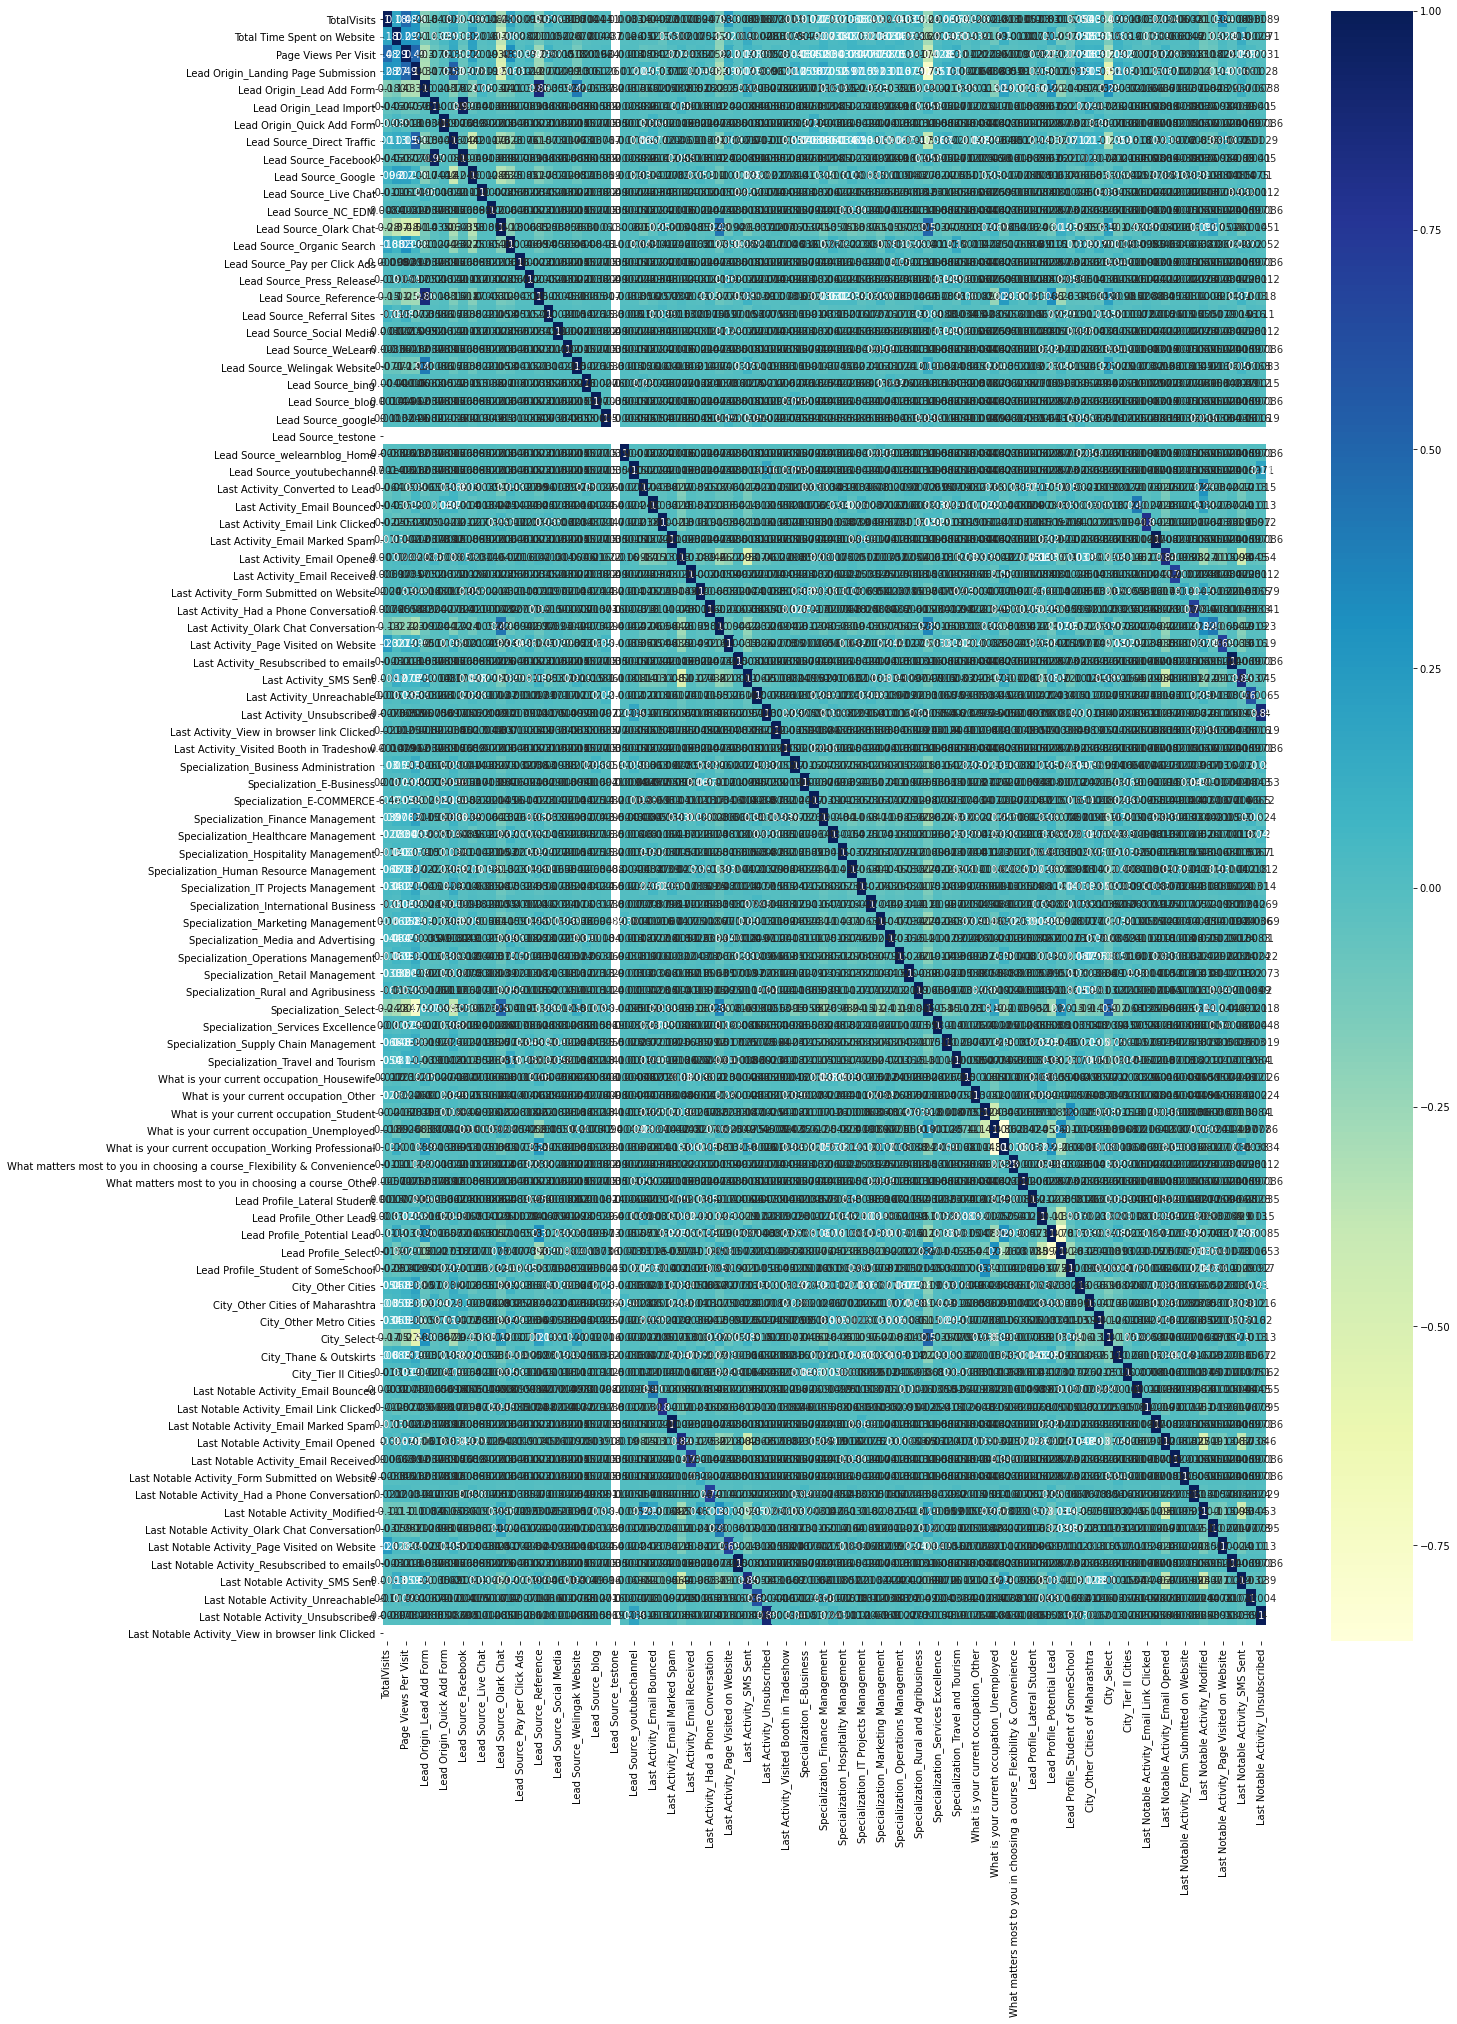

In [61]:
plt.figure(figsize=(20,30))

sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

## Model Building

In [62]:
# Logistic regression model
logreg = LogisticRegression()

In [63]:
# Running rfe with 15 variables
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [64]:
# Features that have been selected byu RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 75),
 ('Lead Origin_Quick Add Form', False, 26),
 ('Lead Source_Direct Traffic', False, 28),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 41),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_NC_EDM', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Pay per Click Ads', False, 57),
 ('Lead Source_Press_Release', False, 37),
 ('Lead Source_Reference', False, 60),
 ('Lead Source_Referral Sites', False, 39),
 ('Lead Source_Social Media', False, 49),
 ('Lead Source_WeLearn', False, 56),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 44),
 ('Lead Source_blog', False, 43),
 ('Lead Source_google', False, 33),
 ('Lead Source_testone', False, 79),
 (

In [65]:
# Putting all the columns selected bt RFE in variable col
col = X_train.columns[rfe.support_]

In [66]:
# Selecting the columns selected by RFE
X_train = X_train[col]

In [67]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2520.4
Date:                Mon, 08 Feb 2021   Deviance:                       5040.7
Time:                        12:35:45   Pearson chi2:                 7.87e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0419      0.110     -9.508      0.000      -1.257      -0.827
TotalVisits                                              5.0912      1.751      2.908      0.004       1.660       8.522
Total Time Spent on Website                              4.5344      0.168     26.924      0.000       4.204       4.864
Lead Origin_Lead Add Form                                3.3116      0.198     16.709      0.000       2.923       3.700
Lead Source_Olark Chat                                   1.4421      0.111     12.983      0.000       1.224       1.660
Lead Source_Welingak Website                             2.6180      0.745      3.513      0.000       1.158       4.078
Last Activity_Email Bounced                             -2.3489      0.386     -6.079      0.000      -3.106      -1.592
Last Activity_Olark Chat Conversation                   -1.3536      0.171     -7.907      0.000      -1.689      -1.018
What is your current occupation_Housewife               23.1105   1.32e+04      0.002      0.999   -2.58e+04    2.58e+04
What is your current occupation_Working Professional     2.4244      0.191     12.660      0.000       2.049       2.800
Lead Profile_Other Leads                                -1.3903      0.172     -8.086      0.000      -1.727      -1.053
Lead Profile_Select                                     -1.8688      0.098    -19.007      0.000      -2.062      -1.676
Lead Profile_Student of SomeSchool                      -3.5277      0.441     -7.996      0.000      -4.392      -2.663
Last Notable Activity_Email Bounced                      1.9536      0.604      3.235      0.001       0.770       3.137
Last Notable Activity_Had a Phone Conversation           3.0949      1.177      2.630      0.009       0.788       5.402
Last Notable Activity_SMS Sent                           1.5898      0.082     19.455      0.000       1.430       1.750
========================================================================================================================
"""

In [68]:
# Make a VIF dataframe
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Feature,VIF
10,Lead Profile_Select,2.46
1,Total Time Spent on Website,1.82
3,Lead Source_Olark Chat,1.69
0,TotalVisits,1.50
6,Last Activity_Olark Chat Conversation,1.41
14,Last Notable Activity_SMS Sent,1.41
2,Lead Origin_Lead Add Form,1.38
5,Last Activity_Email Bounced,1.26
4,Lead Source_Welingak Website,1.25
12,Last Notable Activity_Email Bounced,1.21


In [69]:
X_train.drop('What is your current occupation_Housewife', axis=1, inplace=True)

In [70]:
# Refit the model with new set of datframes
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2527.1
Date:                Mon, 08 Feb 2021   Deviance:                       5054.2
Time:                        12:35:45   Pearson chi2:                 7.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0348      0.109     -9.461      0.000      -1.249      -0.820
TotalVisits                                              5.0237      1.736      2.893      0.004       1.620       8.427
Total Time Spent on Website                              4.5299      0.168     26.931      0.000       4.200       4.860
Lead Origin_Lead Add Form                                3.3264      0.198     16.822      0.000       2.939       3.714
Lead Source_Olark Chat                                   1.4365      0.111     12.953      0.000       1.219       1.654
Lead Source_Welingak Website                             2.5978      0.745      3.487      0.000       1.138       4.058
Last Activity_Email Bounced                             -2.3585      0.387     -6.099      0.000      -3.116      -1.601
Last Activity_Olark Chat Conversation                   -1.3573      0.171     -7.930      0.000      -1.693      -1.022
What is your current occupation_Working Professional     2.4160      0.191     12.620      0.000       2.041       2.791
Lead Profile_Other Leads                                -1.3465      0.170     -7.931      0.000      -1.679      -1.014
Lead Profile_Select                                     -1.8694      0.098    -19.028      0.000      -2.062      -1.677
Lead Profile_Student of SomeSchool                      -3.5304      0.441     -8.003      0.000      -4.395      -2.666
Last Notable Activity_Email Bounced                      1.9566      0.604      3.239      0.001       0.773       3.141
Last Notable Activity_Had a Phone Conversation           3.0903      1.177      2.626      0.009       0.784       5.397
Last Notable Activity_SMS Sent                           1.5852      0.082     19.410      0.000       1.425       1.745
========================================================================================================================
"""

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,Lead Profile_Select,2.46
1,Total Time Spent on Website,1.82
3,Lead Source_Olark Chat,1.69
0,TotalVisits,1.50
6,Last Activity_Olark Chat Conversation,1.41
13,Last Notable Activity_SMS Sent,1.41
2,Lead Origin_Lead Add Form,1.37
5,Last Activity_Email Bounced,1.26
4,Lead Source_Welingak Website,1.25
11,Last Notable Activity_Email Bounced,1.21


In [72]:
# Dropping Last Notable Activity_Email Bounced column
X_train.drop('Last Notable Activity_Email Bounced', axis=1, inplace=True)

In [73]:
# Refit the model with new dataframe
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()) 
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.9
Date:                Mon, 08 Feb 2021   Deviance:                       5063.9
Time:                        12:35:45   Pearson chi2:                 7.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0387      0.109     -9.506      0.000      -1.253      -0.825
TotalVisits                                              5.0899      1.752      2.905      0.004       1.656       8.524
Total Time Spent on Website                              4.5240      0.168     26.934      0.000       4.195       4.853
Lead Origin_Lead Add Form                                3.2910      0.196     16.800      0.000       2.907       3.675
Lead Source_Olark Chat                                   1.4344      0.111     12.942      0.000       1.217       1.652
Lead Source_Welingak Website                             2.7095      0.750      3.614      0.000       1.240       4.179
Last Activity_Email Bounced                             -1.7705      0.300     -5.897      0.000      -2.359      -1.182
Last Activity_Olark Chat Conversation                   -1.3569      0.171     -7.933      0.000      -1.692      -1.022
What is your current occupation_Working Professional     2.4185      0.192     12.618      0.000       2.043       2.794
Lead Profile_Other Leads                                -1.3366      0.170     -7.884      0.000      -1.669      -1.004
Lead Profile_Select                                     -1.8626      0.098    -19.008      0.000      -2.055      -1.671
Lead Profile_Student of SomeSchool                      -3.5051      0.441     -7.950      0.000      -4.369      -2.641
Last Notable Activity_Had a Phone Conversation           3.0889      1.176      2.626      0.009       0.783       5.395
Last Notable Activity_SMS Sent                           1.5846      0.082     19.415      0.000       1.425       1.745
========================================================================================================================
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,Lead Profile_Select,2.46
1,Total Time Spent on Website,1.82
3,Lead Source_Olark Chat,1.69
0,TotalVisits,1.50
6,Last Activity_Olark Chat Conversation,1.41
12,Last Notable Activity_SMS Sent,1.41
2,Lead Origin_Lead Add Form,1.37
4,Lead Source_Welingak Website,1.25
7,What is your current occupation_Working Profes...,1.20
8,Lead Profile_Other Leads,1.07


## Creating Prediction

In [75]:
 # Predicying the probabilities on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

Prospect ID
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3    0.187414
207aaf73-a121-41b8-96bb-b0d5c38e7a7b    0.135822
db308a34-ade6-4f0d-9779-586c5be188c7    0.239679
1199b37d-f610-4bb8-bf18-15267dec61fa    0.774501
6b2d3b2f-9990-449c-9333-012b578e39c8    0.187414
dtype: float64

In [76]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.18741428, 0.13582167, 0.23967884, ..., 0.18741428, 0.08418479,
       0.18741428])

In [77]:
# DataFrame with covertion rate and probability of predicted ones
y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Conversion_Prob' : y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.187414
1,0,0.135822
2,0,0.239679
3,0,0.774501
4,0,0.187414


In [78]:
# Substituting 0 and 1 with cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.apply(lambda x: 1 if x>=0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.187414,0
1,0,0.135822,0
2,0,0.239679,0
3,0,0.774501,1
4,0,0.187414,0


## Model Evaluation

In [79]:
# Creating Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3568,  434],
       [ 655, 1811]], dtype=int64)

In [80]:
# Predicted     not_churn    churn
# Actual
# not_churn        3568       434
# churn             655      1811

In [81]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8316326530612245

In [82]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positive
FP = confusion[0,1]
# Substituting the value of false negative
FN = confusion[1,0]

In [83]:
# Calculating the sensitivity
TP/(TP + FN)

0.7343876723438767

In [84]:
# Calculating Specificity
TN/(TN + FP)

0.8915542228885557

## Optimise Cutoff (ROC Curve)

In [85]:
def draw(actual, probs):
    
    fr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(12,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characterstic example')
    plt.legend(loc='lowe right')
    plt.show()
    
    return None

In [86]:
fpr, tpr, threshold = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob,
                                       drop_intermediate=False)

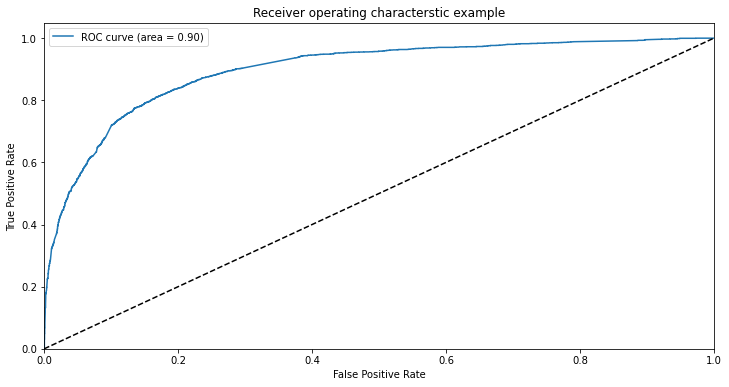

In [87]:
# Call the ROC function
draw(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [88]:
# Creating columns with diffrent probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x> i else 0)
    
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.187414,0,1,1,0,0,0,0,0,0,0,0
1,0,0.135822,0,1,1,0,0,0,0,0,0,0,0
2,0,0.239679,0,1,1,1,0,0,0,0,0,0,0
3,0,0.774501,1,1,1,1,1,1,1,1,1,0,0
4,0,0.187414,0,1,1,0,0,0,0,0,0,0,0


In [89]:
# Creating dataframe to see the values of acuuracy, sensitivity and specificity at diffrent values of probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensitivity', 'specificity'])
numb = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numb:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    
    accuracy = (cm1[0,0] + cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
    
cutoff_df.head()

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.668213,0.960665,0.488006
0.2,0.2,0.782777,0.901460,0.709645
0.3,0.3,0.810761,0.852798,0.784858
0.4,0.4,0.827149,0.789132,0.850575


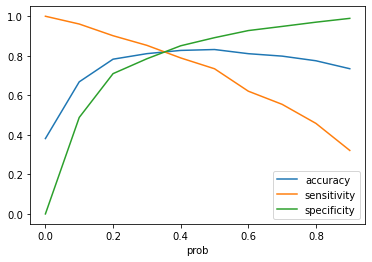

In [90]:
# Plotting 
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.show()

In [91]:
y_train_pred_final['Final_Pred'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Pred
0,0,0.187414,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.135822,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.239679,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.774501,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.187414,0,1,1,0,0,0,0,0,0,0,0,0


In [92]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Pred)

0.8203463203463204

In [93]:
# Creating confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Pred )
confusion1

array([[3284,  718],
       [ 444, 2022]], dtype=int64)

In [94]:
# Substituting thevalue of True positive
TP = confusion1[1,1]
# Substituting the value of True Negative
TN = confusion1[0,0]
# Substituting the value of False Positive
FP = confusion1[0,1]
# Substituting the value of False Negative
FN = confusion1[1,0]

In [95]:
# Calculating the sensitivity
TP/(TP + FN)

0.8199513381995134

In [96]:
# Calculating the specificity
TN/(TN + FP)

0.8205897051474262

## Predicting on Test Set

In [97]:
# Scaling the numeric values
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[[
    'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'
]])

In [98]:
# Substituting all the columns in the final train model
col = X_train.columns

In [99]:
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Lead Profile_Other Leads,Lead Profile_Select,Lead Profile_Student of SomeSchool,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
Prospect ID,,,,,,,,,,,,,,
dd53b3eb-ae22-474c-b872-48b05bbe180b,1.0,0.031873,0.444982,0,0,0,0,0,0,0,1,0,0,1
7a960b03-466c-4e36-bf12-b755fc77a0b1,1.0,0.000000,0.000000,1,0,0,0,0,0,0,1,0,0,1
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,1.0,0.019920,0.025968,0,0,0,0,0,1,0,1,0,0,0
6eb89ae5-d1e0-4c19-8661-8f9545e0e408,1.0,0.000000,0.000000,0,1,0,0,1,0,0,0,0,0,0
f7ed6c72-7d36-413c-b2e0-414213c4ceef,1.0,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0


In [100]:
# Soting prediction of test set in the variable 'Y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Converting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to df
y_test_df = pd.DataFrame(y_test)
# Remove index from both dataframes
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appenf y_pred_df and y_test_df
y_pred_final = pd.concat([y_pred_df, y_test_df], axis=1)
# Renaming columns
y_pred_final = y_pred_final.rename(columns = {0:'Conversion_prob'})

y_pred_final.head()

,Conversion_prob,Converted
0,0.702382,1
1,0.878075,1
2,0.434401,1
3,0.276635,0
4,0.904847,1


In [101]:
# Making prediction using cutoff 0.35
y_pred_final['final_prediction'] = y_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Conversion_prob,Converted,final_prediction
0,0.702382,1,1
1,0.878075,1,1
2,0.434401,1,1
3,0.276635,0,0
4,0.904847,1,1


In [102]:
# Checking the overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_prediction)

0.8196248196248196

In [103]:
# Creating confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_prediction)
confusion3

array([[1389,  288],
       [ 212,  883]], dtype=int64)

In [104]:
# True Positive
TP = confusion3[1,1]
# True Negative
TN = confusion3[0,0]
# False Positive
FP = confusion3[0,1]
# False Negative
FN = confusion3[1,0]

In [105]:
# Sensitivity
TP/(TP + FN)

0.806392694063927

In [106]:
# Specificity
TN/(TN + FP)

0.8282647584973166